In [1]:
%matplotlib inline
# Import the modules
import requests
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests 
import scipy.stats as stats
import random
import folium
from uszipcode import SearchEngine


In [2]:
delivery_data = "delivery_dataframe_run.csv"
delivery_df = pd.read_csv(delivery_data)
delivery_df.head()

,Zip Code,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars
0,10001,50,35.0,0.700000,82.6
1,10002,160,54.0,0.337500,81.6
2,10003,89,62.0,0.696629,78.3
3,10004,20,12.0,0.600000,81.1
4,10005,6,4.0,0.666667,83.5


In [3]:
#calculate the population mean for places that deliver in a specific zip code
population1 = delivery_df[delivery_df["Zip Code"] == 10019]
population1.mean()

Zip Code                       10019.000000
# Pizza/Chinese Restaurants       66.000000
# That Deliver                    48.000000
% That Deliver                     0.727273
% No Cars                         83.800000
dtype: float64

In [4]:
#calculate the population mean for places that deliver in a specific zip code
population1 = delivery_df[delivery_df["Zip Code"] == 10004]
population1.mean()

Zip Code                       10004.0
# Pizza/Chinese Restaurants       20.0
# That Deliver                    12.0
% That Deliver                     0.6
% No Cars                         81.1
dtype: float64

In [5]:
#calculate the population mean for places that deliver in a specific zip code
population1 = delivery_df[delivery_df["Zip Code"] == 10034]
population1.mean()

Zip Code                       10034.0000
# Pizza/Chinese Restaurants       16.0000
# That Deliver                    13.0000
% That Deliver                     0.8125
% No Cars                         73.8000
dtype: float64

In [6]:
delivery_df.set_index('Zip Code', drop=True, inplace=True)
delivery_df

,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars
Zip Code,,,,
10001,50,35.0,0.700000,82.6
10002,160,54.0,0.337500,81.6
10003,89,62.0,0.696629,78.3
10004,20,12.0,0.600000,81.1
10005,6,4.0,0.666667,83.5
10006,12,10.0,0.833333,84.1
10007,17,14.0,0.823529,71.0
10009,38,29.0,0.763158,80.4
10010,30,24.0,0.800000,75.7


In [7]:
# Create random indices representing
# a user's choice of posts
sample = delivery_df.sample(10)
sample

,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars
Zip Code,,,,
11004,6,3.0,0.500000,9.2
10038,35,21.0,0.600000,78.8
10005,6,4.0,0.666667,83.5
10309,14,10.0,0.714286,5.4
10468,25,11.0,0.440000,72.1
11208,37,19.0,0.513514,59.1
11106,36,28.0,0.777778,61.2
11204,53,25.0,0.471698,45.4
11370,7,3.0,0.428571,31.6


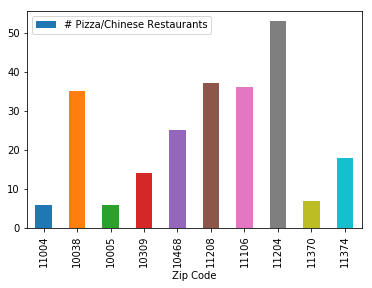

<Figure size 2160x1440 with 0 Axes>

In [9]:
#ANOVA ANALYSIS OF VARIANCE
#Create a boxplot to compare means
mysampleplot = sample.plot.bar(y='# Pizza/Chinese Restaurants')

plt.figure(figsize=(30,20))
plt.show()

fig = mysampleplot.get_figure()
fig.savefig("data.png")

In [ ]:
search = SearchEngine(simple_zipcode=True)
#coordinates = [search.by_zipcode(zipcode).to_json() 
zip_dict = {}
for zipcode in delivery_df.index.values:
    tempDict = search.by_zipcode(zipcode).to_dict()
    zip_dict.update({zipcode: [tempDict['lat'], tempDict['lng']]})
zip_dict

In [ ]:
folium_map = folium.Map(location=[40.7128, -74.0060],
                        zoom_start=13)
                        #tiles="CartoDB dark_matter")

for key in zip_dict:
# radius of circles
    # choose the color of the marker
    if int(delivery_df.loc[key, "# Pizza/Chinese Restaurants"])>30:
        color="#39cc28" # green
    elif int(delivery_df.loc[key, "# Pizza/Chinese Restaurants"])>20:
        color="#2743cc" #blue
    else:
        color="#ea1f09" # green
    radius = int(delivery_df.loc[key, "# Pizza/Chinese Restaurants"]/2)
    marker = folium.CircleMarker(location=zip_dict[key],
                                 radius=radius,
                                 color=color).add_to(folium_map)

folium_map